# 최종 EDA 파일
전처리 방법
1. 소매길이 컬럼 제거 (반팔, 긴팔, 민소매의 구분이 되어있지 않아서)
2. null값이 있는 행 제거
3. 성별의 라이프는 제거
4. 데이터 중복 제거 (기준: 링크, 실측데이터)
5. 브랜드(GLIMMER)에 한해서 110~150 데이터 제거
6. 사이즈 컬럼1(row데이터), 2(수정데이터) 
7. 링크하나에 사이즈가 하나인 제품을 사이즈2 컬럼에 ‘FREESIZE’ 라고 변경
8. 사이즈 맵핑(수작업)
9. EDA 수행
10. 이상치 제거

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
import koreanize_matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv('./data/musinsa_top_product_v230612.csv', encoding="cp949")
df

,제품명,브랜드,성별,사이즈,총장,어깨너비,가슴단면,소매길이,링크
0,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,XS,63.0,47.5,49.0,19.0,https://www.musinsa.com/app/goods/1848166
1,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,S,65.0,49.0,51.5,20.0,https://www.musinsa.com/app/goods/1848166
2,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,M,69.0,51.0,55.0,21.5,https://www.musinsa.com/app/goods/1848166
3,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,L,71.0,52.5,57.5,22.5,https://www.musinsa.com/app/goods/1848166
4,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,XL,73.0,54.0,60.0,23.5,https://www.musinsa.com/app/goods/1848166
...,...,...,...,...,...,...,...,...,...
101523,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,M,70.0,58.5,61.5,60.0,https://www.musinsa.com/app/goods/1679937
101524,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,L,71.5,60.0,64.0,61.0,https://www.musinsa.com/app/goods/1679937
101525,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,XL,75.0,61.5,66.5,62.0,https://www.musinsa.com/app/goods/1679937
101526,CHANCE HOODIE(ORANGE/기모),CHANCECHANCE,남,M,69.0,56.0,70.0,63.0,https://www.musinsa.com/app/goods/1670376


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101528 entries, 0 to 101527
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   제품명     101528 non-null  object 
 1   브랜드     101528 non-null  object 
 2   성별      101528 non-null  object 
 3   사이즈     101528 non-null  object 
 4   총장      101519 non-null  float64
 5   어깨너비    97095 non-null   float64
 6   가슴단면    101469 non-null  float64
 7   소매길이    97366 non-null   float64
 8   링크      101528 non-null  object 
dtypes: float64(4), object(5)
memory usage: 7.0+ MB


# Null 값 확인 및 비율

In [4]:
df.isnull().sum()

제품명        0
브랜드        0
성별         0
사이즈        0
총장         9
어깨너비    4433
가슴단면      59
소매길이    4162
링크         0
dtype: int64

실측 데이터(총장, 어깨너비, 가슴단면, 소매길이) 중 한개라도 null 값이 있는 데이터 확인

전체 데이터 개수 : 101528
실측데이터 중 하나라도 nan 값이 있는 데이터 개수 : 7161
실측데이터 중 하나라도 nan 값이 있는 데이터 비율 : 7.05 %


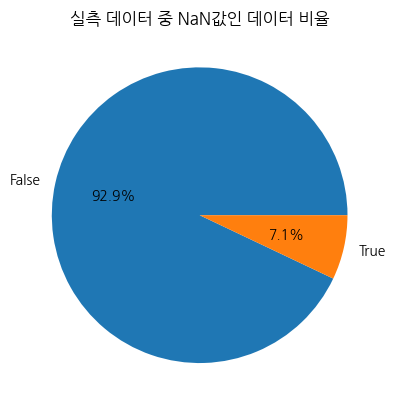

In [5]:
(df.총장.isnull() | df.어깨너비.isnull() | df.가슴단면.isnull() | df.소매길이.isnull()).value_counts().plot.pie(autopct="%.1f%%")
plt.title('실측 데이터 중 NaN값인 데이터 비율');

print('전체 데이터 개수 :', len(df))
print('실측데이터 중 하나라도 nan 값이 있는 데이터 개수 :', len(df[df.총장.isnull() | df.어깨너비.isnull() | df.가슴단면.isnull() | df.소매길이.isnull()]))
print('실측데이터 중 하나라도 nan 값이 있는 데이터 비율 :', round(len(df[df.총장.isnull() | df.어깨너비.isnull() | df.가슴단면.isnull() | df.소매길이.isnull()])/len(df)*100,2), '%')
# df[df.총장.isnull() | df.어깨너비.isnull() | df.가슴단면.isnull() | df.소매길이.isnull()]

소매길이 컬럼 제거

In [7]:
a = df.drop('소매길이', axis=1)
(a.총장.isnull() | a.어깨너비.isnull() | a.가슴단면.isnull()).value_counts()

False    97052
True      4476
dtype: int64

전체 데이터 개수 : 101528
실측데이터 중 하나라도 nan 값이 있는 데이터 개수 : 4476
실측데이터 중 하나라도 nan 값이 있는 데이터 비율 : 4.41


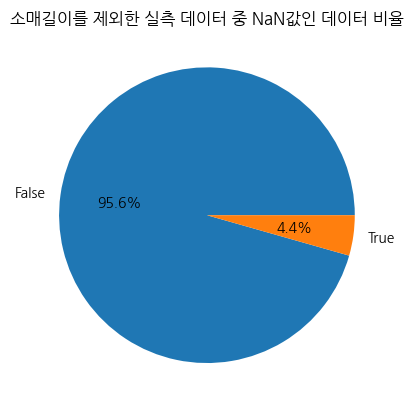

In [8]:
(a.총장.isnull() | a.어깨너비.isnull() | a.가슴단면.isnull()).value_counts().plot.pie(autopct="%.1f%%")
plt.title('소매길이를 제외한 실측 데이터 중 NaN값인 데이터 비율');


print('전체 데이터 개수 :', len(df))
print('실측데이터 중 하나라도 nan 값이 있는 데이터 개수 :', len(a[a.총장.isnull() | a.어깨너비.isnull() | a.가슴단면.isnull()]))
print('실측데이터 중 하나라도 nan 값이 있는 데이터 비율 :', round(len(a[a.총장.isnull() | a.어깨너비.isnull() | a.가슴단면.isnull()])/len(a)*100, 2))

In [9]:
p_na = pd.DataFrame([
    len(a[~(a.총장.isnull() | a.어깨너비.isnull() | a.가슴단면.isnull())].링크.unique()),
    len(a[a.총장.isnull() | a.어깨너비.isnull() | a.가슴단면.isnull()].링크.unique())
    ], columns=['NaN'], index=['False', 'True'])
p_na

,NaN
False,31621
True,2056


전체 제품 개수 : 33675
실측데이터 중 하나라도 nan 값이 있는 제품 개수 : 2056
실측데이터 중 하나라도 nan 값이 있는 제품 비율 : 6.11


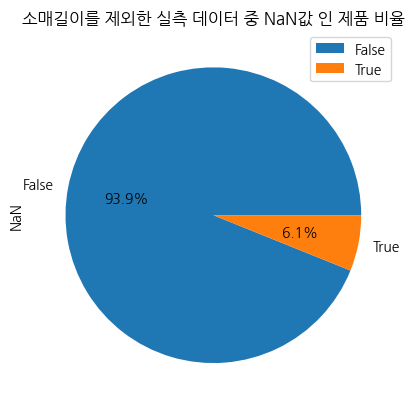

In [10]:
p_na.plot.pie(y='NaN', autopct="%.1f%%")
plt.title('소매길이를 제외한 실측 데이터 중 NaN값 인 제품 비율');

print('전체 제품 개수 :', len(a.링크.unique()))
print('실측데이터 중 하나라도 nan 값이 있는 제품 개수 :', len(a[a.총장.isnull() | a.어깨너비.isnull() | a.가슴단면.isnull()].링크.unique()))
print('실측데이터 중 하나라도 nan 값이 있는 제품 비율 :', round(len(a[a.총장.isnull() | a.어깨너비.isnull() | a.가슴단면.isnull()].링크.unique())/len(a.링크.unique())*100, 2))

총장의 결측값 비율: 0.0089%
어깨너비의 결측값 비율: 4.3663%
가슴단면의 결측값 비율: 0.0581%
소매길이의 결측값 비율: 4.0994%


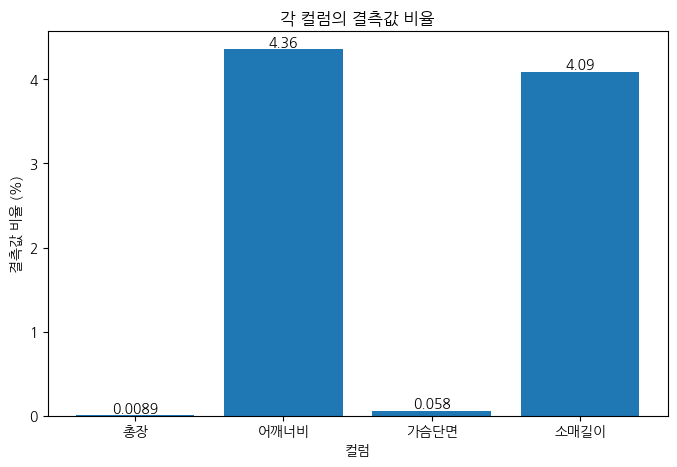

In [12]:
import matplotlib.pyplot as plt

### 컬럼별 결측치 구성
cnt_null = df.isnull().sum().to_frame('null_cnt')
cnt_null = cnt_null[cnt_null.null_cnt != 0]
cnt_null

# 각 컬럼별 결측치 비율
all_top_product_cnt = df.shape[0]

for col, count in cnt_null.iterrows():
    ratio = (count.null_cnt / all_top_product_cnt) * 100
    print(f"{col}의 결측값 비율: {ratio:.4f}%")

columns = ['총장', '어깨너비', '가슴단면', '소매길이']
missing_ratios = [0.0089, 4.36, 0.058, 4.09]

plt.figure(figsize=(8, 5))
plt.bar(columns, missing_ratios)
for i, count in enumerate(missing_ratios):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel('컬럼')
plt.ylabel('결측값 비율 (%)')
plt.title('각 컬럼의 결측값 비율')
plt.show()

### 널 값 제거(소매길이 컬럼 제거 된 데이터프레임)

In [13]:
df_notnull = a.copy()
df_notnull = df_notnull.dropna()
df_notnull.isnull().sum()

제품명     0
브랜드     0
성별      0
사이즈     0
총장      0
어깨너비    0
가슴단면    0
링크      0
dtype: int64

결측치 제거 후 개수 비교

In [ ]:
print('결측치 제거 전 :', len(df))

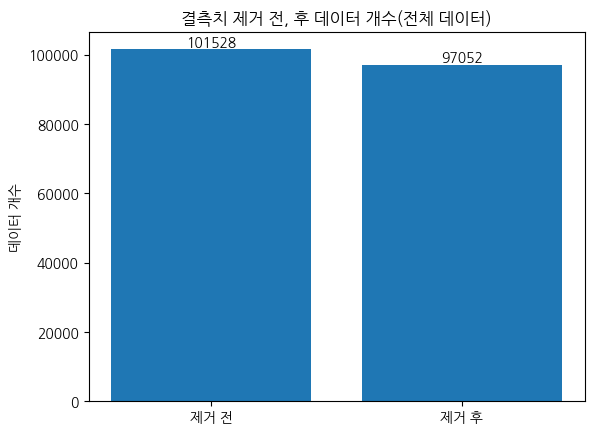

전체 데이터 개수 :  101528
결측치 제거 후 데이터 개수 : 97052
데이터 개수 차이: 4476
결측 데이터 퍼센트: 4.408636041289102


In [16]:
# 데이터프레임의 행 개수
all_top_product_cnt = df.shape[0]  # 전체 데이터 개수
all_top_product_notnull_cnt = df_notnull.shape[0] # 결측치 제거 후 데이터 개수 

# 막대 그래프로 행 개수 표시
categories = ['제거 전', '제거 후']
data = [all_top_product_cnt, all_top_product_notnull_cnt]

plt.bar(categories, data)
plt.ylabel('데이터 개수')
plt.title('결측치 제거 전, 후 데이터 개수(전체 데이터)')

for i, count in enumerate(data):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()


# 결측 데이터 퍼센트
difference = all_top_product_cnt - all_top_product_notnull_cnt
percentage_lost = (difference / all_top_product_cnt) * 100

print('전체 데이터 개수 : ', all_top_product_cnt)
print('결측치 제거 후 데이터 개수 :', len(df_notnull))
print("데이터 개수 차이:", difference)
print("결측 데이터 퍼센트:", percentage_lost)

### 성별 확인

In [17]:
df_notnull.성별.unique()

array(['남여', '남', '여', '라이프'], dtype=object)

In [24]:
print('성별이 라이프인 데이터 개수 :', len(df_notnull[df_notnull.성별=='라이프']))
print('성별이 라이프인 제품 개수 :', len(df_notnull[df_notnull.성별=='라이프']['링크'].unique()))

성별이 라이프인 데이터 개수 : 19
성별이 라이프인 제품 개수 : 6


> 갯수가 적어 라이프는 제거

In [26]:
print('전처리된 전체 데이터 개수 :', len(df_notnull))
df_notnull[~(df_notnull.성별=='라이프')]

전처리된 전체 데이터 개수 : 97052


,제품명,브랜드,성별,사이즈,총장,어깨너비,가슴단면,링크
0,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,XS,63.0,47.5,49.0,https://www.musinsa.com/app/goods/1848166
1,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,S,65.0,49.0,51.5,https://www.musinsa.com/app/goods/1848166
2,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,M,69.0,51.0,55.0,https://www.musinsa.com/app/goods/1848166
3,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,L,71.0,52.5,57.5,https://www.musinsa.com/app/goods/1848166
4,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,XL,73.0,54.0,60.0,https://www.musinsa.com/app/goods/1848166
...,...,...,...,...,...,...,...,...
101523,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,M,70.0,58.5,61.5,https://www.musinsa.com/app/goods/1679937
101524,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,L,71.5,60.0,64.0,https://www.musinsa.com/app/goods/1679937
101525,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,XL,75.0,61.5,66.5,https://www.musinsa.com/app/goods/1679937
101526,CHANCE HOODIE(ORANGE/기모),CHANCECHANCE,남,M,69.0,56.0,70.0,https://www.musinsa.com/app/goods/1670376


In [27]:
df_notnull = df_notnull[~(df_notnull.성별=='라이프')]
print('라이프 제거 후 데이터 개수 :', len(df_notnull))

라이프 제거 후 데이터 개수 : 97033


### 데이터 개수 확인 후 중복 제거

In [28]:
link_cnt = pd.DataFrame(df_notnull.링크.value_counts()).reset_index().rename(columns={'index':'링크', '링크':'개수'})
link_cnt['제품코드'] = link_cnt.링크.apply(lambda x: x.split('/')[-1])
link_cnt

,링크,개수,제품코드
0,https://www.musinsa.com/app/goods/3165851,48,3165851
1,https://www.musinsa.com/app/goods/1307248,40,1307248
2,https://www.musinsa.com/app/goods/209988,24,209988
3,https://www.musinsa.com/app/goods/2553512,15,2553512
4,https://www.musinsa.com/app/goods/1558847,14,1558847
...,...,...,...
31610,https://www.musinsa.com/app/goods/3330187,1,3330187
31611,https://www.musinsa.com/app/goods/3330185,1,3330185
31612,https://www.musinsa.com/app/goods/3330182,1,3330182
31613,https://www.musinsa.com/app/goods/3330181,1,3330181


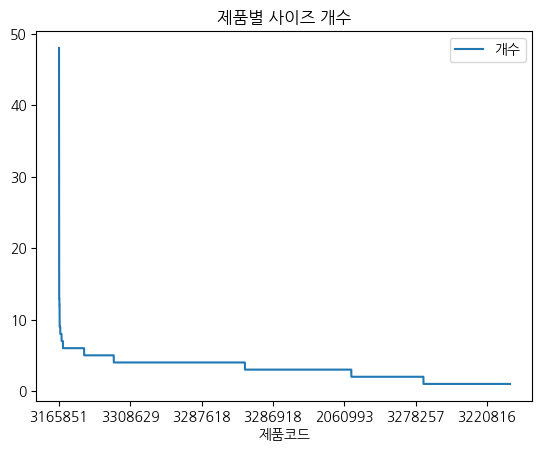

In [29]:
link_cnt.plot(x='제품코드', y='개수')
plt.title('제품별 사이즈 개수');

In [30]:
df[df.링크=='https://www.musinsa.com/app/goods/3165851']['사이즈']

3431            WHITE S
3432            WHITE M
3433            WHITE L
3434           WHITE XL
3435            BLACK S
3436            BLACK M
3437            BLACK L
3438           BLACK XL
3439            CREAM S
3440            CREAM M
3441            CREAM L
3442           CREAM XL
3443       LIGHT GREY S
3444       LIGHT GREY M
3445       LIGHT GREY L
3446      LIGHT GREY XL
3447             NAVY S
3448             NAVY M
3449             NAVY L
3450            NAVY XL
3451            GREEN S
3452            GREEN M
3453            GREEN L
3454           GREEN XL
3455            KHAKI S
3456            KHAKI M
3457            KHAKI L
3458           KHAKI XL
3459            BROWN S
3460            BROWN M
3461            BROWN L
3462           BROWN XL
3463           ORANGE S
3464           ORANGE M
3465           ORANGE L
3466          ORANGE XL
3467     LIGHT VILOET S
3468     LIGHT VILOET M
3469     LIGHT VILOET L
3470    LIGHT VILOET XL
3471             PINK S
3472            

> 사이즈 중복으로 제거 필요

In [32]:
print('중복 제거 전 데이터 개수 :', len(df_notnull))

df_not_dup = df_notnull.drop_duplicates(['총장', '어깨너비', '가슴단면', '링크'])
print('중복 제거 후 데이터 개수 :', len(df_not_dup))

df_not_dup.링크.value_counts()

중복 제거 전 데이터 개수 : 97033
중복 제거 후 데이터 개수 : 96321


https://www.musinsa.com/app/goods/1519433    13
https://www.musinsa.com/app/goods/1519430    13
https://www.musinsa.com/app/goods/1519422    13
https://www.musinsa.com/app/goods/1519435    13
https://www.musinsa.com/app/goods/1519413    13
                                             ..
https://www.musinsa.com/app/goods/3333886     1
https://www.musinsa.com/app/goods/3332551     1
https://www.musinsa.com/app/goods/3332258     1
https://www.musinsa.com/app/goods/2352698     1
https://www.musinsa.com/app/goods/1661633     1
Name: 링크, Length: 31615, dtype: int64

> 사이즈 개수가 여전히 13개인 제품을 확인 한 결과 아용동 사이즈까지 포함되어있음.  
따라서 제거 필요

### 아동용 사이즈 제거

In [34]:
df_not_dup[df_not_dup.브랜드=='GLIMMER']['사이즈']

144      SS
145       S
146       M
147       L
148      LL
         ..
99285     L
99286    LL
99287    3L
99288    4L
99289    5L
Name: 사이즈, Length: 388, dtype: object

In [36]:
print('사이즈가 110~150(아동용)인 데이터 개수 :', len(df_not_dup[(df_not_dup['브랜드']=='GLIMMER') & df_not_dup['사이즈'].isin(['110', '120', '130', '140', '150'])]
))

df_not_dup[(df_not_dup['브랜드']=='GLIMMER') & df_not_dup['사이즈'].isin(['110', '120', '130', '140', '150'])]

사이즈가 110~150(아동용)인 데이터 개수 : 95


,제품명,브랜드,성별,사이즈,총장,어깨너비,가슴단면,링크
35120,300-ACT 메쉬 무지 반팔티 네이비,GLIMMER,남여,110,44.0,30.0,34.0,https://www.musinsa.com/app/goods/1519414
35121,300-ACT 메쉬 무지 반팔티 네이비,GLIMMER,남여,120,48.0,34.0,36.0,https://www.musinsa.com/app/goods/1519414
35122,300-ACT 메쉬 무지 반팔티 네이비,GLIMMER,남여,130,52.0,36.0,38.0,https://www.musinsa.com/app/goods/1519414
35123,300-ACT 메쉬 무지 반팔티 네이비,GLIMMER,남여,140,56.0,38.0,40.0,https://www.musinsa.com/app/goods/1519414
35124,300-ACT 메쉬 무지 반팔티 네이비,GLIMMER,남여,150,59.0,40.0,42.0,https://www.musinsa.com/app/goods/1519414
...,...,...,...,...,...,...,...,...
99277,300-ACT 메쉬 무지 반팔티 핫핑크,GLIMMER,남여,110,44.0,30.0,34.0,https://www.musinsa.com/app/goods/1519435
99278,300-ACT 메쉬 무지 반팔티 핫핑크,GLIMMER,남여,120,48.0,34.0,36.0,https://www.musinsa.com/app/goods/1519435
99279,300-ACT 메쉬 무지 반팔티 핫핑크,GLIMMER,남여,130,52.0,36.0,38.0,https://www.musinsa.com/app/goods/1519435
99280,300-ACT 메쉬 무지 반팔티 핫핑크,GLIMMER,남여,140,56.0,38.0,40.0,https://www.musinsa.com/app/goods/1519435


In [38]:
df_not_dup = df_not_dup[~((df_not_dup['브랜드']=='GLIMMER') & df_not_dup['사이즈'].isin(['110', '120', '130', '140', '150']))]
print('아동용 사이즈 제거 후 데이터 개수 :', len(df_not_dup))
df_not_dup

아동용 사이즈 제거 후 데이터 개수 : 96226


,제품명,브랜드,성별,사이즈,총장,어깨너비,가슴단면,링크
0,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,XS,63.0,47.5,49.0,https://www.musinsa.com/app/goods/1848166
1,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,S,65.0,49.0,51.5,https://www.musinsa.com/app/goods/1848166
2,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,M,69.0,51.0,55.0,https://www.musinsa.com/app/goods/1848166
3,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,L,71.0,52.5,57.5,https://www.musinsa.com/app/goods/1848166
4,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,XL,73.0,54.0,60.0,https://www.musinsa.com/app/goods/1848166
...,...,...,...,...,...,...,...,...
101523,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,M,70.0,58.5,61.5,https://www.musinsa.com/app/goods/1679937
101524,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,L,71.5,60.0,64.0,https://www.musinsa.com/app/goods/1679937
101525,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,XL,75.0,61.5,66.5,https://www.musinsa.com/app/goods/1679937
101526,CHANCE HOODIE(ORANGE/기모),CHANCECHANCE,남,M,69.0,56.0,70.0,https://www.musinsa.com/app/goods/1670376


In [39]:
df_not_dup[(df_not_dup['브랜드']=='GLIMMER') & df_not_dup['사이즈'].isin(['110', '120', '130', '140', '150'])]

,제품명,브랜드,성별,사이즈,총장,어깨너비,가슴단면,링크


### 사이즈 표기법 변환

In [40]:
# 원본 사이즈 구분을 위해 사이즈2 컬럼 생성
df_not_dup['사이즈2'] = df_not_dup.사이즈

In [48]:
print('사이즈가 1개인 제품 개수 :', len(df_not_dup[df_not_dup.링크.isin(link_cnt[link_cnt.개수==1].링크)]))
df_not_dup[df_not_dup.링크.isin(link_cnt[link_cnt.개수==1].링크)]

사이즈가 1개인 제품 개수 : 6066


,제품명,브랜드,성별,사이즈,총장,어깨너비,가슴단면,링크,사이즈2
188,TSHIRT FLOWERMARDI_IVORY NAVY,MARDI MERCREDI,여,FREE,65.0,46.0,54.0,https://www.musinsa.com/app/goods/2453556,FREE
331,IN LOVE TEE(WHITE),LUV IS TRUE,여,FREE,57.0,43.0,50.0,https://www.musinsa.com/app/goods/1779737,FREE
341,TSHIRT FLOWERMARDI_WHITE GREEN,MARDI MERCREDI,여,FREE,65.0,46.0,54.0,https://www.musinsa.com/app/goods/1503352,FREE
407,TSHIRT FLOWERMARDI_BLACK CREAM,MARDI MERCREDI,여,FREE,65.0,46.0,54.0,https://www.musinsa.com/app/goods/2453552,FREE
452,DN STAR LOGO TEE(PINK),LUV IS TRUE,여,FREE,60.0,42.5,52.0,https://www.musinsa.com/app/goods/3067178,FREE
...,...,...,...,...,...,...,...,...,...
101434,클럽 팀 프레쉬 코튼 티셔츠 - 블루 그레이,FCMM,남여,XL,74.0,52.0,57.5,https://www.musinsa.com/app/goods/1880675,XL
101456,TNR7부 박스티 핑크,TENER,남,F,76.5,73.0,71.0,https://www.musinsa.com/app/goods/1862595,F
101515,New Urban Half Tee (black),JULIAPEPE,여,옵션없음,68.0,57.0,58.0,https://www.musinsa.com/app/goods/1777798,옵션없음
101526,CHANCE HOODIE(ORANGE/기모),CHANCECHANCE,남,M,69.0,56.0,70.0,https://www.musinsa.com/app/goods/1670376,M


In [53]:
df_not_dup.loc[df_not_dup[df_not_dup.링크.isin(link_cnt[link_cnt.개수==1].링크)].index, '사이즈2']

188       FREE
331       FREE
341       FREE
407       FREE
452       FREE
          ... 
101434      XL
101456       F
101515    옵션없음
101526       M
101527    FREE
Name: 사이즈2, Length: 6066, dtype: object

In [54]:
df_not_dup.loc[df_not_dup[df_not_dup.링크.isin(link_cnt[link_cnt.개수==1].링크)].index, '사이즈2'] = 'FREESIZE'
df_not_dup[df_not_dup.링크.isin(link_cnt[link_cnt.개수==1].링크)]

,제품명,브랜드,성별,사이즈,총장,어깨너비,가슴단면,링크,사이즈2
188,TSHIRT FLOWERMARDI_IVORY NAVY,MARDI MERCREDI,여,FREE,65.0,46.0,54.0,https://www.musinsa.com/app/goods/2453556,FREESIZE
331,IN LOVE TEE(WHITE),LUV IS TRUE,여,FREE,57.0,43.0,50.0,https://www.musinsa.com/app/goods/1779737,FREESIZE
341,TSHIRT FLOWERMARDI_WHITE GREEN,MARDI MERCREDI,여,FREE,65.0,46.0,54.0,https://www.musinsa.com/app/goods/1503352,FREESIZE
407,TSHIRT FLOWERMARDI_BLACK CREAM,MARDI MERCREDI,여,FREE,65.0,46.0,54.0,https://www.musinsa.com/app/goods/2453552,FREESIZE
452,DN STAR LOGO TEE(PINK),LUV IS TRUE,여,FREE,60.0,42.5,52.0,https://www.musinsa.com/app/goods/3067178,FREESIZE
...,...,...,...,...,...,...,...,...,...
101434,클럽 팀 프레쉬 코튼 티셔츠 - 블루 그레이,FCMM,남여,XL,74.0,52.0,57.5,https://www.musinsa.com/app/goods/1880675,FREESIZE
101456,TNR7부 박스티 핑크,TENER,남,F,76.5,73.0,71.0,https://www.musinsa.com/app/goods/1862595,FREESIZE
101515,New Urban Half Tee (black),JULIAPEPE,여,옵션없음,68.0,57.0,58.0,https://www.musinsa.com/app/goods/1777798,FREESIZE
101526,CHANCE HOODIE(ORANGE/기모),CHANCECHANCE,남,M,69.0,56.0,70.0,https://www.musinsa.com/app/goods/1670376,FREESIZE


### 사이즈 재정의(맵핑)

In [66]:
df_not_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96226 entries, 0 to 101527
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품명     96226 non-null  object 
 1   브랜드     96226 non-null  object 
 2   성별      96226 non-null  object 
 3   사이즈     96226 non-null  object 
 4   총장      96226 non-null  float64
 5   어깨너비    96226 non-null  float64
 6   가슴단면    96226 non-null  float64
 7   링크      96226 non-null  object 
 8   사이즈2    96226 non-null  object 
dtypes: float64(3), object(6)
memory usage: 9.4+ MB


In [67]:
df_not_dup.reset_index(drop=True, inplace=True)
df_not_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96226 entries, 0 to 96225
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품명     96226 non-null  object 
 1   브랜드     96226 non-null  object 
 2   성별      96226 non-null  object 
 3   사이즈     96226 non-null  object 
 4   총장      96226 non-null  float64
 5   어깨너비    96226 non-null  float64
 6   가슴단면    96226 non-null  float64
 7   링크      96226 non-null  object 
 8   사이즈2    96226 non-null  object 
dtypes: float64(3), object(6)
memory usage: 6.6+ MB


In [56]:
df_not_dup.사이즈2

0               XS
1                S
2                M
3                L
4               XL
            ...   
101523           M
101524           L
101525          XL
101526    FREESIZE
101527    FREESIZE
Name: 사이즈2, Length: 96226, dtype: object

In [57]:
size_dict = {
    'xsmall':'XS', 'small' :'S', 'medium':'M', 'large':'L', 'xlarge':'XL',
    'Xsmall':'XS', 'Small' :'S', 'Medium':'M', 'Large':'L', 'Xlarge':'XL',
    'SMALL' :'S', 'MEDIUM':'M', 'LARGE':'L', 'EXTRA LARGE':'XL', 'EXTRA L':'XL',
    '85':'XS', '90':'S', '95':'M', '100':'L', '105':'XL', '110':'XXL', '115':'XXXL',
    '2XL':'XXL', '3XL':'XXXL', '4XL':'XXXXL'
}

size_dict2 = {
    'SS':'XS', 'LL':'XL', '3L':'XXL', '4L':'XXXL', '5L':'XXXXL',
    'W1':'XS', 'W2':'S'
}

size_label = ['XS', 'S', 'M', 'XXXL', 'XXL', 'XL', 'L'] # 'FREE'

# 여성 의류인 경우만 적용
size_dict3 = {
    '44':'XS', '55':'S', '66':'M', '77':'L', '88':'XL',
}

# 남성 미국 사이즈
size_ameri = {
    '14':'XS', '15':'S', '16':'M', '17':'L', '18':'XL'
}

In [59]:
print('사이즈 맵핑 전 개수 : ',len(df_not_dup.사이즈.unique().tolist()))

사이즈 맵핑 전 개수 :  1743


In [61]:
df_not_dup.사이즈2.replace(size_dict, regex=True, inplace=True)
size_li = df_not_dup.사이즈2.unique().tolist()
print('1차 맵핑 결과 :', len(size_li))

1차 맵핑 결과 : 1507


In [62]:
df_not_dup.사이즈2.replace(size_dict2, regex=True, inplace=True)
size_li = df_not_dup.사이즈2.unique().tolist()
print('2차 맵핑 결과 :', len(size_li))

2차 맵핑 결과 : 1500


In [68]:
# df_not_dup[df_not_dup.성별=='여'].사이즈2 = df_not_dup[df_not_dup.성별=='여'].사이즈2.replace(size_dict3, regex=True)

for k, v in size_dict3.items():
    for idx, row in df_not_dup.iterrows():
        if (row.성별=='여') & (k in row.사이즈2):
            df_not_dup.loc[idx, '사이즈2'] = v

size_li = df_not_dup.사이즈2.unique().tolist()
print('3차 맵핑 결과 :', len(size_li))

3차 맵핑 결과 : 1471


In [69]:
df_not_dup.사이즈2.replace(size_ameri, regex=True, inplace=True)
size_li = df_not_dup.사이즈2.unique().tolist()
print('4차 맵핑 결과 :', len(size_li))

4차 맵핑 결과 : 1467


In [71]:
df_not_dup[(df_not_dup.성별=='여')&(df_not_dup['사이즈2']=='44')]

,제품명,브랜드,성별,사이즈,총장,어깨너비,가슴단면,링크,사이즈2


In [72]:
size_li

['XS',
 'S',
 'M',
 'L',
 'XL',
 'XXL',
 'XXXL',
 'WS',
 'S (우먼)',
 'S [여성전용 프리사이즈]',
 'S[0S]',
 'M[0M]',
 'L[L]',
 'XL[XL]',
 'XXL[XXL]',
 'XXXXL',
 'FREESIZE',
 'XS_0XS',
 'S_0S',
 'M_0M',
 'L_L',
 'XL_XL',
 '(백메란지)1',
 '(백메란지)2',
 '(백메란지)3',
 'S(FREE)',
 'OLIVE_M',
 'OLIVE_L',
 'M(린넨)',
 'L(린넨)',
 'XL(린넨)',
 'F',
 'S (WOMAN)',
 '화이트 M',
 '화이트 L',
 '1',
 '2',
 '3',
 '44',
 '46',
 '48',
 '50',
 '52',
 '화이트 1',
 '화이트 2',
 '화이트 3',
 'ivoryM',
 'ivoryL',
 '48(M)',
 '50(L)',
 '45수 특양면 반팔 (화이트) M',
 '45수 특양면 반팔 (화이트) L',
 '45수 특양면 반팔 (화이트) XL',
 '45수 특양면 반팔 (화이트) XXL',
 '차콜 M',
 '차콜 L',
 'S(Women)',
 'S(기모)',
 'M(기모)',
 'L(기모)',
 'XL(기모)',
 '0',
 '42 (FOR WOMAN)',
 'NAVY XS',
 'NAVY S',
 'NAVY M',
 'NAVY L',
 'NAVY XL',
 '엔젤 화이트 와펜 반팔 티셔츠 화이트 XS',
 '엔젤 화이트 와펜 반팔 티셔츠 화이트 S',
 '엔젤 화이트 와펜 반팔 티셔츠 화이트 M',
 '엔젤 화이트 와펜 반팔 티셔츠 화이트 L',
 '엔젤 화이트 와펜 반팔 티셔츠 화이트 XL',
 'XS(여성55-66)',
 '4',
 'M (1)',
 'L (2)',
 '1 (M)',
 '2 (L)',
 '3 (XL)',
 '[M]',
 '[L]',
 '[XL]',
 '02 다크그레이 / 0사이즈',
 '02 다크그레이 / 1사이즈',

한글 제거

In [79]:
# 한글을 공백('')으로 대체
df_not_dup.사이즈2.replace('[ㄱ-ㅎㅏ-ㅣ가-힣]+', '', regex=True, inplace=True)
size_li = df_not_dup.사이즈2.unique().tolist()
len(size_li)

1090

특수문자, 공백을 기준으로 사이즈 문자열 분할 후 사이즈 찾기1(문자 사이즈)

In [85]:
import re

def size_find(size_li):
    for idx, row in df_not_dup.iterrows():
        size_name = row.사이즈2  # 초기 사이즈명 저장 
        # 특수문자와 공백을 기준으로 문자열 분할
        size_str_li = re.split(r"[^\w\s]| ", size_name)
        # 공백 제거
        size_str_li = [word.strip() for word in size_str_li if word.strip()]
        
        cnt, li_in_find_size = 0, []    # 사이즈 나온 개수, 나온 사이즈 저장 리스트

        for tmp in size_str_li: # 위에서 정한 fine_size가 있으면 저장
            if tmp in size_li:
                cnt += 1
                li_in_find_size.append(tmp)
        
        # 사이즈가 한 번만 나왔거나 여러번 나왔는데 똑같은 경우
        if cnt == 1 or len(set(li_in_find_size)) == 1:
            df_not_dup.loc[idx, '사이즈2'] = li_in_find_size[0]
        elif len(set(li_in_find_size)) > 1:
#             df_not_dup.loc[idx, '사이즈2'] = ', '.join(list(set(li_in_find_size)))
            df_not_dup.drop(idx, axis=0, inplace=True)

In [86]:
# '_' 문자 ','으로 치환
df_not_dup.사이즈2.replace('_', ',', regex=True, inplace=True)

size_li = ['XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL']
size_find(size_li)

size_li = df_not_dup.사이즈2.unique().tolist()
len(size_li)

248

In [88]:
size_li

['XS',
 'S',
 'M',
 'L',
 'XL',
 'XXL',
 'XXXL',
 'WS',
 'XXXXL',
 'FREESIZE',
 '()1',
 '()2',
 '()3',
 'F',
 '1',
 '2',
 '3',
 '44',
 '46',
 '48',
 '50',
 '52',
 ' 1',
 ' 2',
 ' 3',
 'ivoryM',
 'ivoryL',
 '0',
 '42 (FOR WOMAN)',
 '4',
 '02  / 0',
 '02  / 1',
 '02  / 2',
 '0 Size',
 '1 Size',
 '2 Size',
 '3 Size',
 'SIZE 2',
 'SIZE 3',
 ' (X)',
 'SIZE 1',
 '2 size',
 '3 size',
 '1 (CROP)',
 '2 (STANDARD)',
 '1(Crop Fit)',
 '1.5(Standard Fit)',
 '2(Over fit)',
 '2(Over Fit)',
 'slim fit',
 'ragular fit',
 '0XS',
 '00S',
 '00M',
 '00L',
 '0XL',
 'whiteM',
 'whiteL',
 '1 size',
 '01S',
 '02M',
 '3 ',
 '4 ',
 'XXS',
 'Navy',
 ' FREE',
 '6',
 '8',
 'S003',
 'M004',
 '',
 '54',
 'Size1',
 'Size2',
 '1 SIZE',
 '2 SIZE',
 'WOMAN',
 'MAN',
 'FREE',
 'BIG1 (XXXXL~5XL)',
 'BIG2 (5XL~6XL)',
 '1 ()',
 '2 ()',
 'SLIM',
 'S1',
 'S2',
 'FREE()',
 '1(Straight Fit)',
 'L005',
 'XL006',
 '0XXL',
 '130',
 '120',
 '1 /  ',
 '2 / 6 20  ',
 '3 / 6 20  ',
 '4 / 6 20  ',
 '1.5',
 'OVER',
 '1(semi overfit)',
 '

대문자로 변경

In [89]:
df_not_dup['사이즈2'] = df_not_dup['사이즈2'].str.upper()
size_li = df_not_dup.사이즈2.unique().tolist()
len(size_li)

229

In [95]:
len(df_not_dup[df_not_dup.사이즈2.isin(['01S','02M'])])

34

In [96]:
size_dict_ = {'0XS':'XS', '00S':'S', '00M':'M', '00L':'L', '0XL':'XL'}

df_not_dup.사이즈2.replace(size_dict_, regex=True, inplace=True)
size_li = df_not_dup.사이즈2.unique().tolist()
len(size_li)

224

In [97]:
size_li

['XS',
 'S',
 'M',
 'L',
 'XL',
 'XXL',
 'XXXL',
 'WS',
 'XXXXL',
 'FREESIZE',
 '()1',
 '()2',
 '()3',
 'F',
 '1',
 '2',
 '3',
 '44',
 '46',
 '48',
 '50',
 '52',
 ' 1',
 ' 2',
 ' 3',
 'IVORYM',
 'IVORYL',
 '0',
 '42 (FOR WOMAN)',
 '4',
 '02  / 0',
 '02  / 1',
 '02  / 2',
 '0 SIZE',
 '1 SIZE',
 '2 SIZE',
 '3 SIZE',
 'SIZE 2',
 'SIZE 3',
 ' (X)',
 'SIZE 1',
 '1 (CROP)',
 '2 (STANDARD)',
 '1(CROP FIT)',
 '1.5(STANDARD FIT)',
 '2(OVER FIT)',
 'SLIM FIT',
 'RAGULAR FIT',
 'WHITEM',
 'WHITEL',
 '01S',
 '02M',
 '3 ',
 '4 ',
 'XXS',
 'NAVY',
 ' FREE',
 '6',
 '8',
 'S003',
 'M004',
 '',
 '54',
 'SIZE1',
 'SIZE2',
 'WOMAN',
 'MAN',
 'FREE',
 'BIG1 (XXXXL~5XL)',
 'BIG2 (5XL~6XL)',
 '1 ()',
 '2 ()',
 'SLIM',
 'S1',
 'S2',
 'FREE()',
 '1(STRAIGHT FIT)',
 'L005',
 'XL006',
 '0XXL',
 '130',
 '120',
 '1 /  ',
 '2 / 6 20  ',
 '3 / 6 20  ',
 '4 / 6 20  ',
 '1.5',
 'OVER',
 '1(SEMI OVERFIT)',
 '1()',
 '2()',
 '3()',
 '91',
 'WOMEN - ONE',
 '0 ',
 '1 ',
 '2 ',
 'WM',
 '4 SIZE',
 'BLACK',
 'WOMEN-ONE',
 '1

In [98]:
df_not_dup[df_not_dup.사이즈2.isin(size_label+['FREESIZE'])]

,제품명,브랜드,성별,사이즈,총장,어깨너비,가슴단면,링크,사이즈2
0,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,XS,63.0,47.5,49.0,https://www.musinsa.com/app/goods/1848166,XS
1,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,S,65.0,49.0,51.5,https://www.musinsa.com/app/goods/1848166,S
2,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,M,69.0,51.0,55.0,https://www.musinsa.com/app/goods/1848166,M
3,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,L,71.0,52.5,57.5,https://www.musinsa.com/app/goods/1848166,L
4,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,XL,73.0,54.0,60.0,https://www.musinsa.com/app/goods/1848166,XL
...,...,...,...,...,...,...,...,...,...
96221,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,M,70.0,58.5,61.5,https://www.musinsa.com/app/goods/1679937,M
96222,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,L,71.5,60.0,64.0,https://www.musinsa.com/app/goods/1679937,L
96223,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,XL,75.0,61.5,66.5,https://www.musinsa.com/app/goods/1679937,XL
96224,CHANCE HOODIE(ORANGE/기모),CHANCECHANCE,남,M,69.0,56.0,70.0,https://www.musinsa.com/app/goods/1670376,FREESIZE


In [99]:
result = df_not_dup[df_not_dup.사이즈2.isin(size_label+['FREESIZE'])].reset_index(drop=True)
result

,제품명,브랜드,성별,사이즈,총장,어깨너비,가슴단면,링크,사이즈2
0,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,XS,63.0,47.5,49.0,https://www.musinsa.com/app/goods/1848166,XS
1,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,S,65.0,49.0,51.5,https://www.musinsa.com/app/goods/1848166,S
2,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,M,69.0,51.0,55.0,https://www.musinsa.com/app/goods/1848166,M
3,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,L,71.0,52.5,57.5,https://www.musinsa.com/app/goods/1848166,L
4,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,XL,73.0,54.0,60.0,https://www.musinsa.com/app/goods/1848166,XL
...,...,...,...,...,...,...,...,...,...
88631,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,M,70.0,58.5,61.5,https://www.musinsa.com/app/goods/1679937,M
88632,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,L,71.5,60.0,64.0,https://www.musinsa.com/app/goods/1679937,L
88633,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,XL,75.0,61.5,66.5,https://www.musinsa.com/app/goods/1679937,XL
88634,CHANCE HOODIE(ORANGE/기모),CHANCECHANCE,남,M,69.0,56.0,70.0,https://www.musinsa.com/app/goods/1670376,FREESIZE


---

In [100]:
result.사이즈2.unique()

array(['XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL', 'FREESIZE'], dtype=object)

In [101]:
# 프리사이즈 분포 확인
result['FREESIZE'] = result.사이즈2.apply(lambda x: 1 if x=='FREESIZE' else 0)
result

,제품명,브랜드,성별,사이즈,총장,어깨너비,가슴단면,링크,사이즈2,FREESIZE
0,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,XS,63.0,47.5,49.0,https://www.musinsa.com/app/goods/1848166,XS,0
1,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,S,65.0,49.0,51.5,https://www.musinsa.com/app/goods/1848166,S,0
2,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,M,69.0,51.0,55.0,https://www.musinsa.com/app/goods/1848166,M,0
3,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,L,71.0,52.5,57.5,https://www.musinsa.com/app/goods/1848166,L,0
4,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,COVERNAT,남여,XL,73.0,54.0,60.0,https://www.musinsa.com/app/goods/1848166,XL,0
...,...,...,...,...,...,...,...,...,...,...
88631,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,M,70.0,58.5,61.5,https://www.musinsa.com/app/goods/1679937,M,0
88632,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,L,71.5,60.0,64.0,https://www.musinsa.com/app/goods/1679937,L,0
88633,SITTING PUPPY CREWNECK KS [MELANGE GREY],VIVASTUDIO,남,XL,75.0,61.5,66.5,https://www.musinsa.com/app/goods/1679937,XL,0
88634,CHANCE HOODIE(ORANGE/기모),CHANCECHANCE,남,M,69.0,56.0,70.0,https://www.musinsa.com/app/goods/1670376,FREESIZE,1


In [185]:
result.to_csv('./data/products_final.csv', encoding='euc-kr')

---

# EDA

In [102]:
result[result['FREESIZE']==1]

,제품명,브랜드,성별,사이즈,총장,어깨너비,가슴단면,링크,사이즈2,FREESIZE
184,TSHIRT FLOWERMARDI_IVORY NAVY,MARDI MERCREDI,여,FREE,65.0,46.0,54.0,https://www.musinsa.com/app/goods/2453556,FREESIZE,1
323,IN LOVE TEE(WHITE),LUV IS TRUE,여,FREE,57.0,43.0,50.0,https://www.musinsa.com/app/goods/1779737,FREESIZE,1
333,TSHIRT FLOWERMARDI_WHITE GREEN,MARDI MERCREDI,여,FREE,65.0,46.0,54.0,https://www.musinsa.com/app/goods/1503352,FREESIZE,1
399,TSHIRT FLOWERMARDI_BLACK CREAM,MARDI MERCREDI,여,FREE,65.0,46.0,54.0,https://www.musinsa.com/app/goods/2453552,FREESIZE,1
443,DN STAR LOGO TEE(PINK),LUV IS TRUE,여,FREE,60.0,42.5,52.0,https://www.musinsa.com/app/goods/3067178,FREESIZE,1
...,...,...,...,...,...,...,...,...,...,...
88544,클럽 팀 프레쉬 코튼 티셔츠 - 블루 그레이,FCMM,남여,XL,74.0,52.0,57.5,https://www.musinsa.com/app/goods/1880675,FREESIZE,1
88566,TNR7부 박스티 핑크,TENER,남,F,76.5,73.0,71.0,https://www.musinsa.com/app/goods/1862595,FREESIZE,1
88625,New Urban Half Tee (black),JULIAPEPE,여,,68.0,57.0,58.0,https://www.musinsa.com/app/goods/1777798,FREESIZE,1
88634,CHANCE HOODIE(ORANGE/기모),CHANCECHANCE,남,M,69.0,56.0,70.0,https://www.musinsa.com/app/goods/1670376,FREESIZE,1


In [103]:
result['FREESIZE'].value_counts()

0    82570
1     6066
Name: FREESIZE, dtype: int64

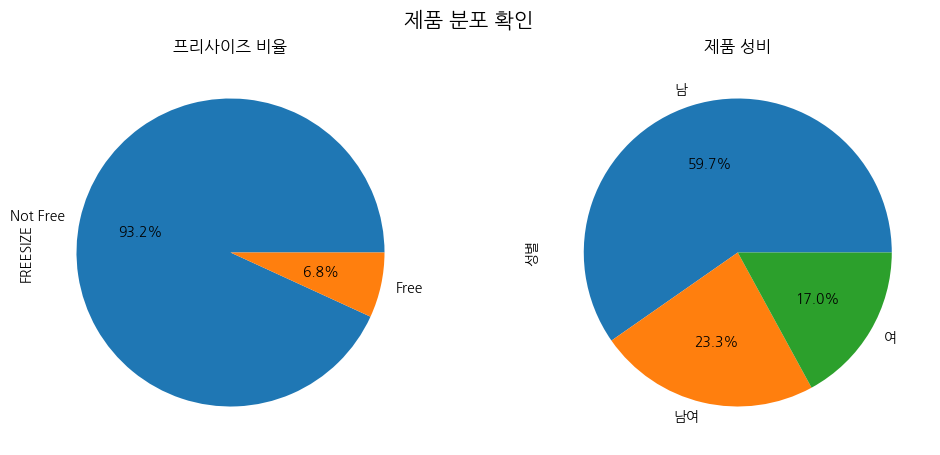

전체 제품 수 :  88636


In [109]:
labels = ['Not Free', 'Free']

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
result['FREESIZE'].value_counts().plot.pie(autopct="%.1f%%", labels=labels, ax=ax[0])
result['성별'].value_counts().plot.pie(autopct="%.1f%%", ax=ax[1])


# for i in ax[0, :]:
#     for p in i.patches:
#         height = int(p.get_height())
#         i.text(p.get_x() + p.get_width() / 2., height, height, ha = 'center', size = 9)

# ax[0, 0].set_xticklabels(labels)    

ax[0].set_title('프리사이즈 비율')
ax[1].set_title('제품 성비')

plt.suptitle('제품 분포 확인', fontsize=15)
plt.show()

print('전체 제품 수 : ', len(result))

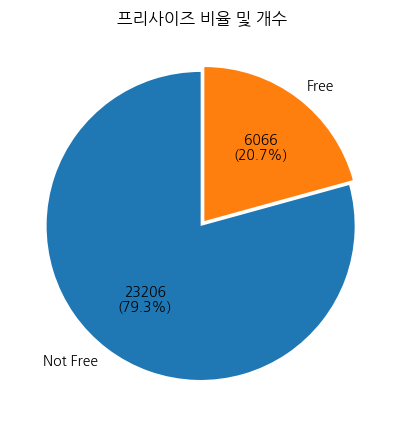

In [124]:
# group_sex_num_product = result.groupby('FREESIZE').size()
group_sex_num_product = result.drop_duplicates(subset=['링크']).groupby('FREESIZE').size()

explode = [0.02, 0.02]  # 간격 설정
plt.figure(figsize=(6, 5))
wedges, texts, autotexts = plt.pie(group_sex_num_product, labels=['Not Free', 'Free'], 
                                   autopct='', startangle=90, explode=explode)  # autopct 설정 제거

# 개수와 비율 텍스트 추가
total_count = sum(group_sex_num_product)
for i, (autotext, count) in enumerate(zip(autotexts, group_sex_num_product)):
    percentage = count / total_count * 100
    autotext.set_text(f'{count}\n({percentage:.1f}%)')

# plt.axis('equal')  # 원형 모양으로 설정
plt.title('프리사이즈 비율 및 개수')
plt.show()


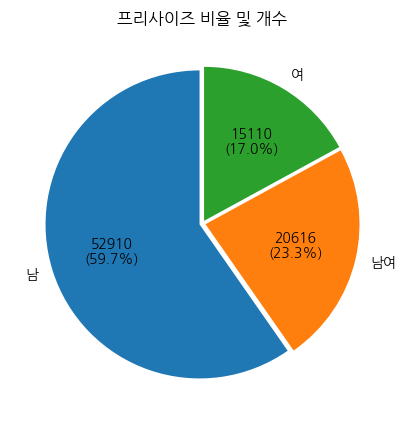

In [123]:
group_sex_num_product = result.groupby('성별').size()
# group_sex_num_product = result.drop_duplicates(subset=['제품명']).groupby('FREESIZE').size()

explode = [0.02, 0.02, 0.02]  # 간격 설정
plt.figure(figsize=(6, 5))
wedges, texts, autotexts = plt.pie(group_sex_num_product, labels=['남', '남여', '여'], 
                                   autopct='', startangle=90, explode=explode)  # autopct 설정 제거

# 개수와 비율 텍스트 추가
total_count = sum(group_sex_num_product)
for i, (autotext, count) in enumerate(zip(autotexts, group_sex_num_product)):
    percentage = count / total_count * 100
    autotext.set_text(f'{count}\n({percentage:.1f}%)')

# plt.axis('equal')  # 원형 모양으로 설정
plt.title('프리사이즈 비율 및 개수')
plt.show()


> 전체 제품 88636개 중 프리사이즈 제품은 6066개로 약 21%를 차지하고, 전체 의류 중 남성 의류가 52910개로 가장 많다.
이는 무신사의 주요 타겟층이 20대 남성이므로 이와 같은 결과가 나온 것을 볼 수 있다.

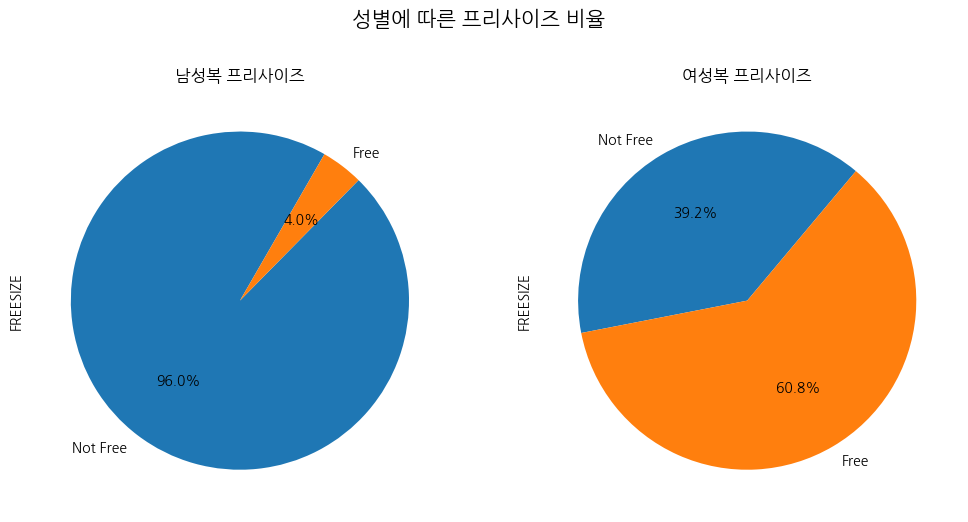

In [127]:
labels1 = ['Not Free', 'Free']
labels2 = ['XS', 'S', 'M', 'L', 'XL', 'FREE']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

result[result['성별']=='남'].drop_duplicates('링크')['FREESIZE'].value_counts().plot.pie(autopct="%.1f%%", labels=labels1, startangle=60, ax=ax[0])
result[result['성별']=='여'].drop_duplicates('링크')['FREESIZE'].value_counts().sort_values().plot.pie(autopct="%.1f%%", labels=labels1, startangle=50, ax=ax[1])

ax[0].set_title('남성복 프리사이즈')
ax[1].set_title('여성복 프리사이즈')

plt.suptitle('성별에 따른 프리사이즈 비율', fontsize=15)
plt.show()

> 남성 의류는 프리사이즈가 아닌 제품이 96%로 대부분의 제품이 사이즈 별로 나뉘어 있다.
여성 의류는 프리사이즈인 제품이 61%로 더 많았다.
남성의류는 프리사이즈인 의류가 극히 적으나, 여성 의류의 프리사이즈가 아닌 제품보다 많다는 것을 통해 프리사이즈 분석이 불가피 하다고 판단한다.

## 브랜드별 데이터 확인

In [128]:
df_brand = pd.DataFrame(result.drop_duplicates('링크').브랜드.value_counts()[:20]).reset_index().rename(columns={'index':'브랜드', '브랜드':'제품수'})
df_brand

,브랜드,제품수
0,MUSINSA STANDARD,1436
1,CPGN STUDIO,341
2,COVERNAT,317
3,YALE,316
4,GRAVER,312
5,DRAW FIT,276
6,THISISNEVERTHAT,261
7,WHATITISNT,244
8,AVANDRESS,226
9,FILLUMINATE,218


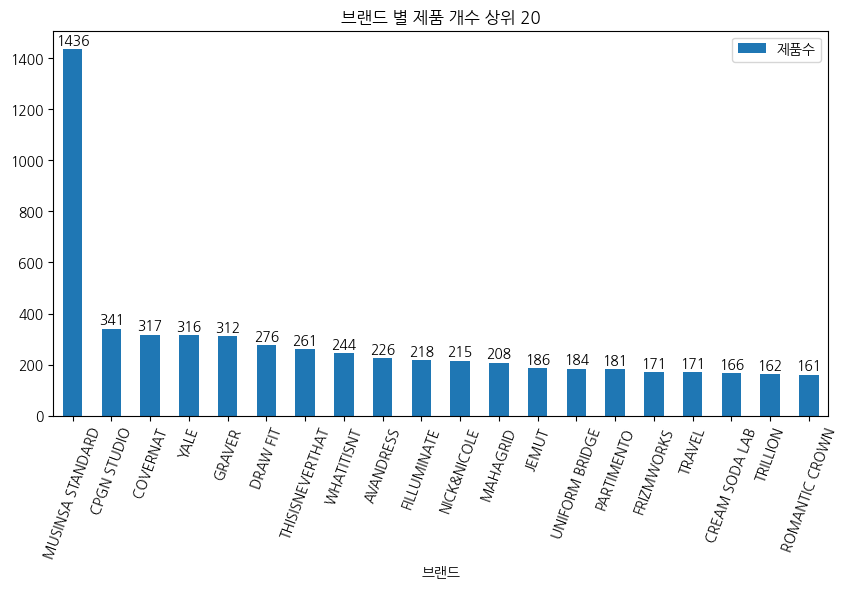

In [130]:
ax = df_brand.plot('브랜드', kind='bar', figsize=(10, 5))
plt.xticks(rotation=70)
plt.cm.BuGn
# plt.colormaps(cmap='BuGn')
for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., height+20, height, ha='center', size=10)
plt.title('브랜드 별 제품 개수 상위 20');

> 무신사의 자체 제작 브랜드인 만큼 'MUSINSA STANDARD'가 가장 많은 제품을 보유하고 있고, 차순위로 'CPGN STUDIO'가 무신사 추천순에 올라왔다.

## 실측 데이터 boxplot 확인

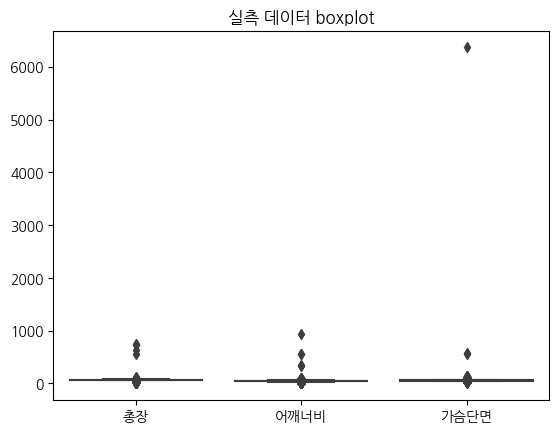

In [133]:
sns.boxplot(result[['총장', '어깨너비', '가슴단면']])
plt.title('실측 데이터 boxplot');

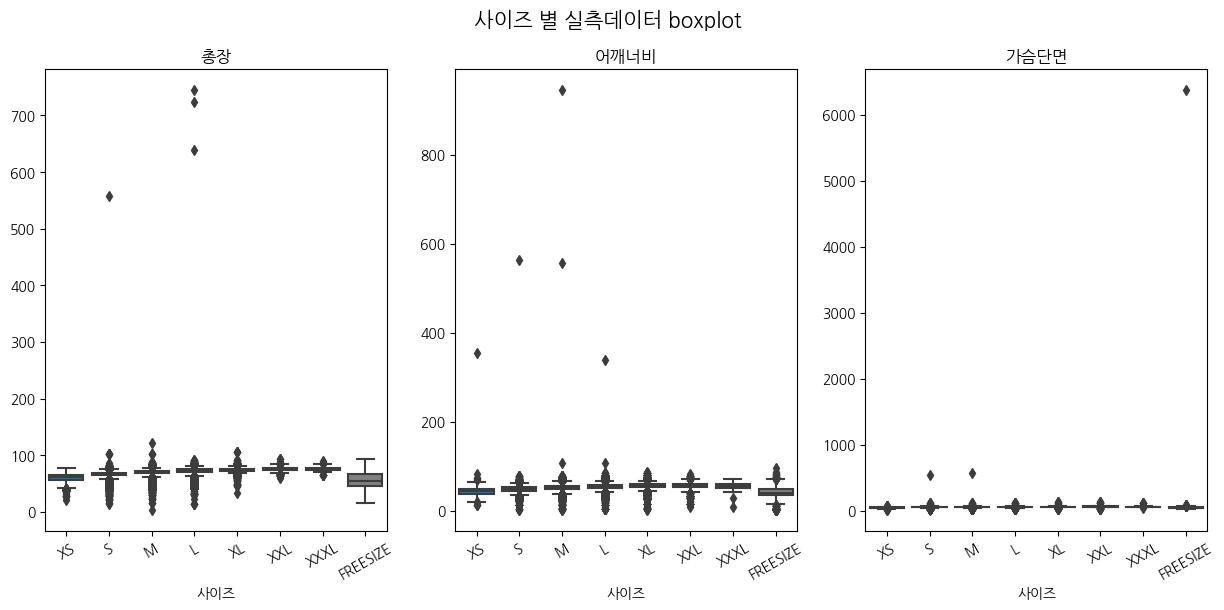

In [150]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
sns.boxplot(result, x='사이즈2', y='총장', ax=ax[0])
sns.boxplot(result, x='사이즈2', y='어깨너비', ax=ax[1])
sns.boxplot(result, x='사이즈2', y='가슴단면', ax=ax[2])

for i in range(3):
    ax[i].set_xlabel('사이즈')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', labelrotation=30)

ax[0].set_title('총장')
ax[1].set_title('어깨너비')
ax[2].set_title('가슴단면')

plt.suptitle('사이즈 별 실측데이터 boxplot', fontsize=15)
plt.show()

> 각 사이즈 별로 boxplot을 구현해 본 결과 이상치가 너무 큰 값이 존재한다.  
매우 큰 값을 제외 하더라도 나머지 이상치도 많이 보인다.  
따라서, 이상치를 제거할 필요가 있다.

## 이상치 제거
- IQR 3배수 이용

In [134]:
man = result[result.성별=='남']
woman = result[result.성별=='여']
mix = result[result.성별=='남여']

In [172]:
q1_man = man.quantile(.25)
q3_man = man.quantile(.75)
q1_woman = woman.quantile(.25)
q3_woman = woman.quantile(.75)
q1_mix = mix.quantile(.25)
q3_mix = mix.quantile(.75)

iqr_man = q3_man - q1_man
iqr_woman = q3_woman - q1_woman
iqr_mix = q3_mix - q1_mix

iqr_man, iqr_woman, iqr_mix

(총장          5.1
 어깨너비        7.5
 가슴단면        7.0
 FREESIZE    0.0
 dtype: float64,
 총장          20.5
 어깨너비        15.0
 가슴단면        13.0
 FREESIZE     1.0
 dtype: float64,
 총장          5.5
 어깨너비        6.0
 가슴단면        6.5
 FREESIZE    0.0
 dtype: float64)

In [173]:
# 여성
# outlier 안에 있는 데이터만 가져오기 
lower_bound_length = q1_woman.총장 - iqr_woman.총장*3
upper_bound_length = q3_woman.총장 + iqr_woman.총장*3
lower_bound_chest = q1_woman.가슴단면 - iqr_woman.가슴단면*3
upper_bound_chest = q3_woman.가슴단면 + iqr_woman.가슴단면*3
lower_bound_shoulder = q1_woman.어깨너비 - iqr_woman.어깨너비*3
upper_bound_shoulder = q3_woman.어깨너비 + iqr_woman.어깨너비*3

musinsa_top_woman = woman[
        ((woman["총장"] >= lower_bound_length) & (woman["총장"] <= upper_bound_length)) &
        ((woman["가슴단면"] >= lower_bound_chest) & (woman["가슴단면"] <= upper_bound_chest))&
        ((woman["어깨너비"] >= lower_bound_shoulder) & (woman["어깨너비"] <= upper_bound_shoulder))
]


# 남성
# outlier 안에 있는 데이터만 가져오기 
lower_bound_length = q1_man.총장 - iqr_man.총장*3
upper_bound_length = q3_man.총장 + iqr_man.총장*3
lower_bound_chest = q1_man.가슴단면 - iqr_man.가슴단면*3
upper_bound_chest = q3_man.가슴단면 + iqr_man.가슴단면*3
lower_bound_shoulder = q1_man.어깨너비 - iqr_man.어깨너비*3
upper_bound_shoulder = q3_man.어깨너비 + iqr_man.어깨너비*3

musinsa_top_man = man[
        ((man["총장"] >= lower_bound_length) & (man["총장"] <= upper_bound_length)) &
        ((man["가슴단면"] >= lower_bound_chest) & (man["가슴단면"] <= upper_bound_chest))&
        ((man["어깨너비"] >= lower_bound_shoulder) & (man["어깨너비"] <= upper_bound_shoulder))
]


# 공용
# outlier 안에 있는 데이터만 가져오기 
lower_bound_length = q1_mix.총장 - iqr_mix.총장*3
upper_bound_length = q3_mix.총장 + iqr_mix.총장*3
lower_bound_chest = q1_mix.가슴단면 - iqr_mix.가슴단면*3
upper_bound_chest = q3_mix.가슴단면 + iqr_mix.가슴단면*3
lower_bound_shoulder = q1_mix.어깨너비 - iqr_mix.어깨너비*3
upper_bound_shoulder = q3_mix.어깨너비 + iqr_mix.어깨너비*3

musinsa_top_mix = mix[
        ((mix["총장"] >= lower_bound_length) & (mix["총장"] <= upper_bound_length)) &
        ((mix["가슴단면"] >= lower_bound_chest) & (mix["가슴단면"] <= upper_bound_chest))&
        ((mix["어깨너비"] >= lower_bound_shoulder) & (mix["어깨너비"] <= upper_bound_shoulder))
]

In [178]:
size_list = ['XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL', 'FREESIZE']

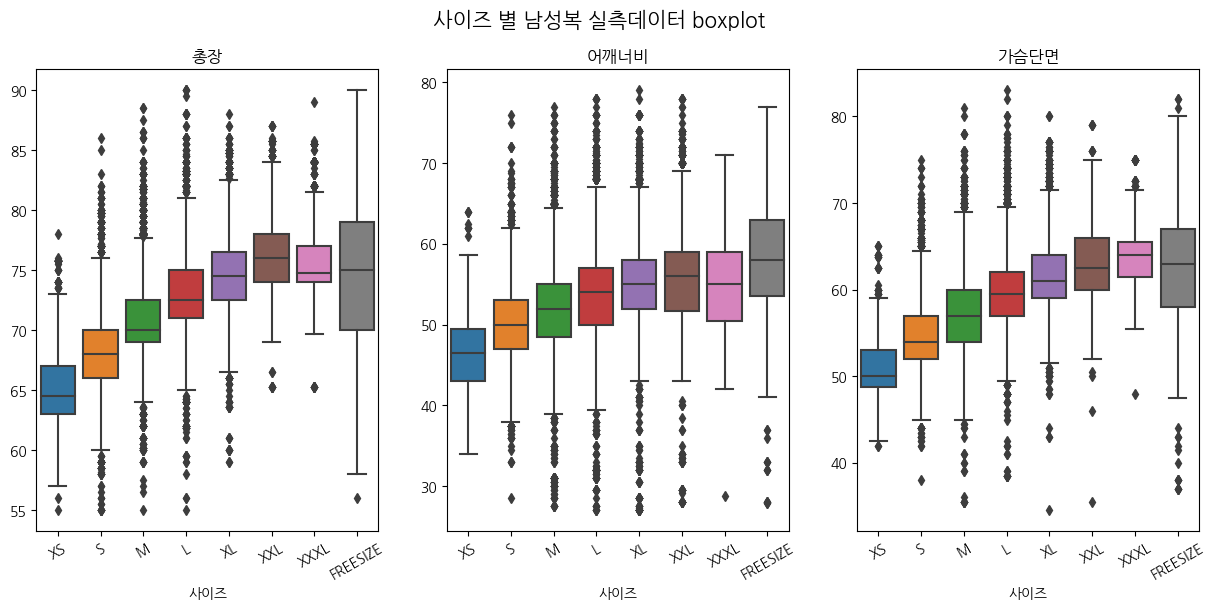

In [180]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
sns.boxplot(musinsa_top_man, x='사이즈2', y='총장', ax=ax[0], order=size_list)
sns.boxplot(musinsa_top_man, x='사이즈2', y='어깨너비', ax=ax[1], order=size_list)
sns.boxplot(musinsa_top_man, x='사이즈2', y='가슴단면', ax=ax[2], order=size_list)

for i in range(3):
    ax[i].set_xlabel('사이즈')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', labelrotation=30)

ax[0].set_title('총장')
ax[1].set_title('어깨너비')
ax[2].set_title('가슴단면')

plt.suptitle('사이즈 별 남성복 실측데이터 boxplot', fontsize=15)
plt.show()

> 남성복에서는 이상치를 제거했음에도 여전히 이상치가 많이 존재한다.  
또한, 사이즈 별로 실측 데이터들이 점차 증가 한 것을 볼 수 있다.  
프리사이즈는 주로 M~XXXL의 분포값을 포함하고 있으며, XXL와 XXXL는 데이터 분포 차이가 크게 나지 않으므로 추후에 통합하는 것을 고려해봐야겠다.

ps. 
Q) 분포를 확인할 수 있니?
A) 데이터 분산을 알기는 어려우나 중앙값이 사이즈 별로...-> 다시 얘기 해보자.

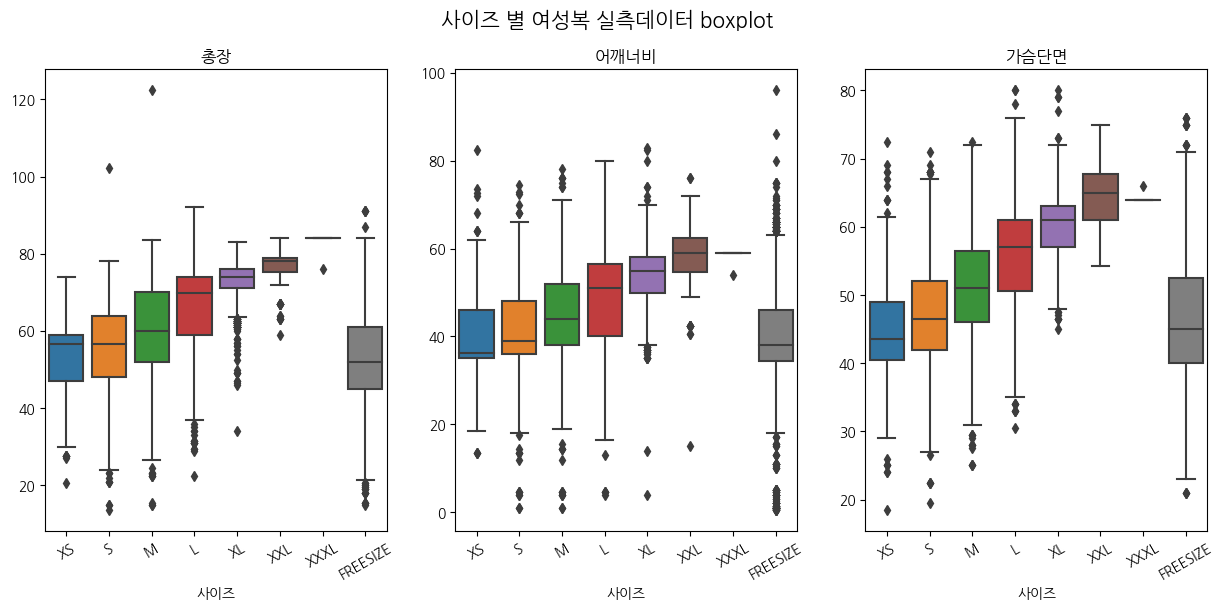

In [181]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
sns.boxplot(musinsa_top_woman, x='사이즈2', y='총장', ax=ax[0], order=size_list)
sns.boxplot(musinsa_top_woman, x='사이즈2', y='어깨너비', ax=ax[1], order=size_list)
sns.boxplot(musinsa_top_woman, x='사이즈2', y='가슴단면', ax=ax[2], order=size_list)

for i in range(3):
    ax[i].set_xlabel('사이즈')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', labelrotation=30)

ax[0].set_title('총장')
ax[1].set_title('어깨너비')
ax[2].set_title('가슴단면')

plt.suptitle('사이즈 별 여성복 실측데이터 boxplot', fontsize=15)
plt.show()

> 여성복은 남성복에 비해 이상치가 적고, 프리사이즈 분포도 XS~S사이즈에 위치해있다.  
또한, 여성복에서는 XXXL의 데이터가 거의 없는 것을 알 수 있다.  
요즘 타이트하거나 크롭한 기장의 패션이 인기를 얻고있어, 프리사이즈의 분포들 또한 낮은 값에 위치한 것으로 보인다.

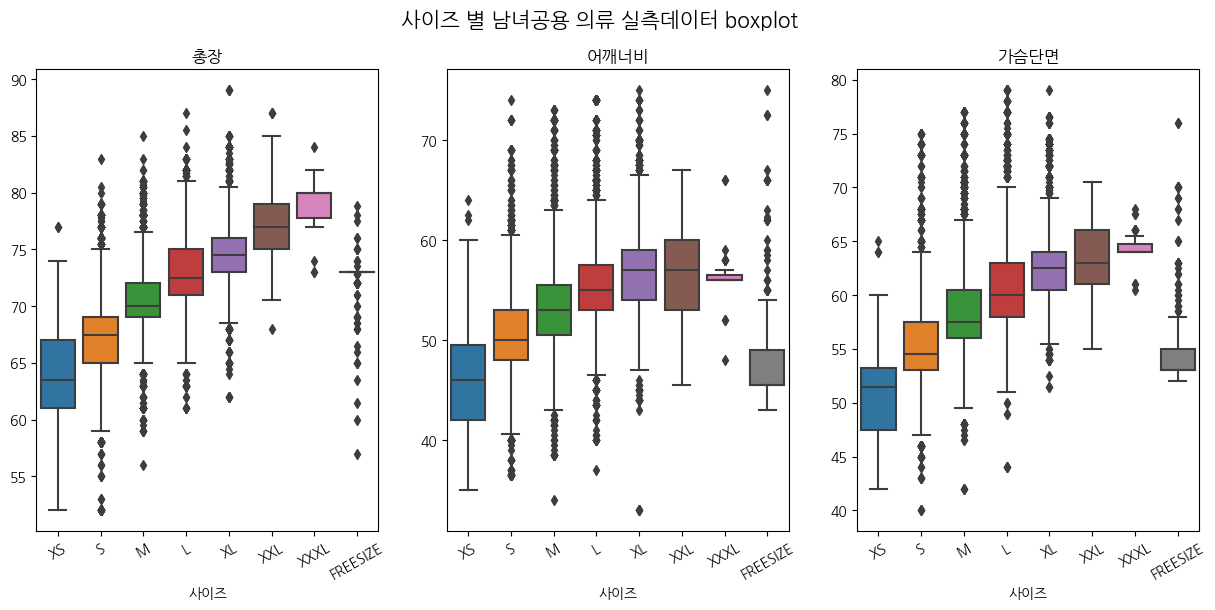

In [182]:
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
sns.boxplot(musinsa_top_mix, x='사이즈2', y='총장', ax=ax[0], order=size_list)
sns.boxplot(musinsa_top_mix, x='사이즈2', y='어깨너비', ax=ax[1], order=size_list)
sns.boxplot(musinsa_top_mix, x='사이즈2', y='가슴단면', ax=ax[2], order=size_list)

for i in range(3):
    ax[i].set_xlabel('사이즈')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', labelrotation=30)

ax[0].set_title('총장')
ax[1].set_title('어깨너비')
ax[2].set_title('가슴단면')

plt.suptitle('사이즈 별 남녀공용 의류 실측데이터 boxplot', fontsize=15)
plt.show()

#### 최종 결론
> 성별과 사이즈 별로 실측데이터의 boxplot을 그려본 결과, 대체적으로 프리사이즈인 경우 데이터 분포 범위가 다른 사이즈 들에 비해 넓다.  
또한, 브랜드 별로 사이즈를 측정하는 기준이 다르기 때문에 이상치가 많이 나왔다고 생각한다.  
이상치가 많고, 데이터가 넓게 분포해 있을 수록 소비자들은 특정 기준으로 옷을 구매할 경우 실패할 확률이 높아지며, 이를 통해 통일된 사이즈로의 재정의가 필요하다고 판단한다. 